# Imports + pipeline call

In [1]:
from pipelines.weather_pipeline import build_weather_dataset
from viz import plot_hist, plot_boxplot

In [2]:
weather_df = build_weather_dataset(save_csv=True)

# EDA Hist / describe

In [3]:
weather_df.describe(include='object')

,conditions,temp_class,windspeed_class,humidity_class,fog_class,freezing_class,cloud_class,hazy_class,pressure_class,rain_class,snow_class
count,4392,4392,4392,4392,4392,4392,4392,4392,4392,4392,4392
unique,23,6,8,5,2,3,6,2,4,4,3
top,Clear,cool,light_air,dry,no_fog,no_freezing_rain_fog,clear,no_haze,normal,no_rain,no_snow
freq,2235,1599,2387,1696,4361,4390,2235,4301,3033,4271,4359


- Exactly one timestamp is duplicated: 2016-03-13 00:51:00; Two different entries (Clear vs. Light
Rain), probably two weather sources or measurements.

## EDA temp Plots

In [4]:
weather_df['temp_c'].describe()

count    4392.000000
mean       10.728907
std         9.158675
min       -18.277778
25%         3.888889
50%        10.611111
75%        17.777778
max        32.222222
Name: temp_c, dtype: float64

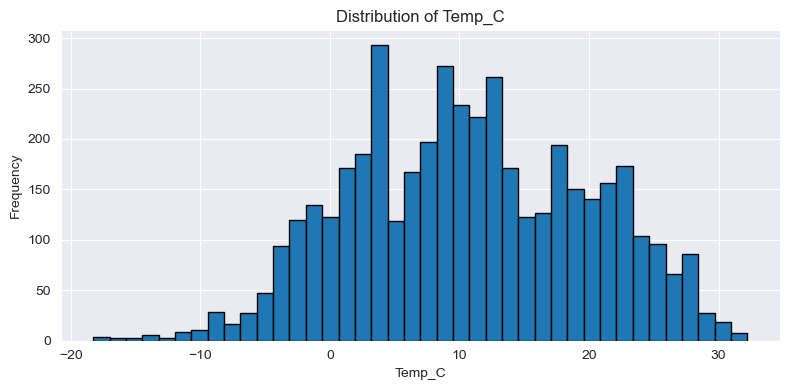

In [5]:
plot_hist(weather_df, 'temp_c')

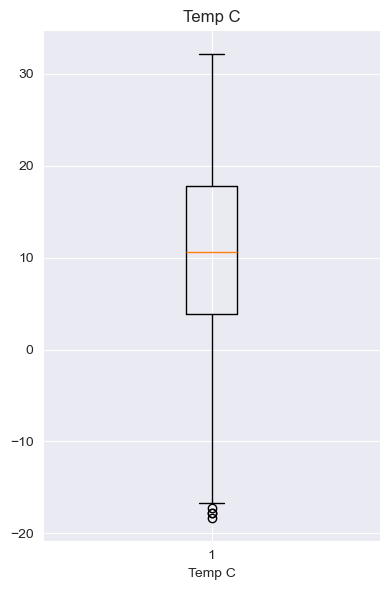

In [6]:
plot_boxplot(weather_df, 'temp_c')

## EDA Windspeed Plots

In [7]:
weather_df['windspeed_kph'].describe()

count    4392.000000
mean       11.047463
std         6.070704
min         0.000000
25%         7.402964
50%         9.334172
75%        13.035654
max       120.000000
Name: windspeed_kph, dtype: float64

In [8]:
weather_df['windspeed_kph'].isna().sum()

0

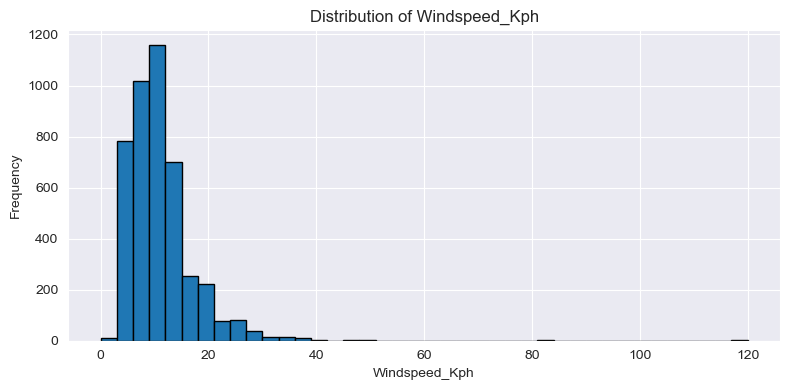

In [9]:
plot_hist(weather_df, 'windspeed_kph')

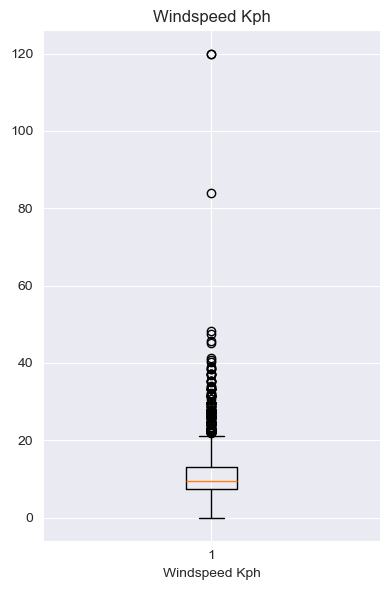

In [10]:
plot_boxplot(weather_df, 'windspeed_kph')

## EDA humidity Plots

In [11]:
weather_df['humidity'].describe()

count    4392.000000
mean       54.144423
std        18.964341
min         9.000000
25%        40.000000
50%        51.000000
75%        67.125000
max       100.000000
Name: humidity, dtype: float64

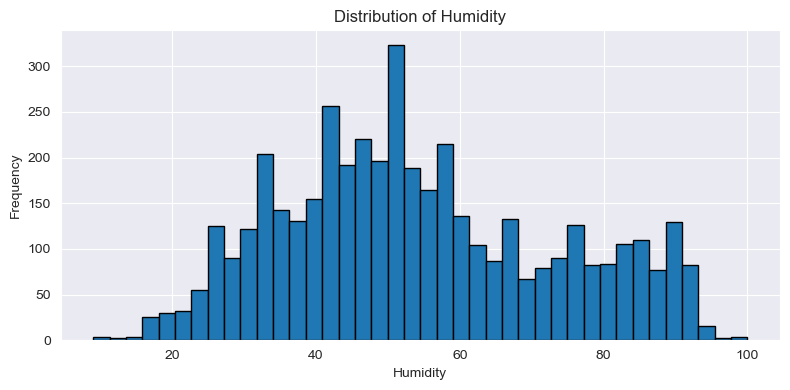

In [12]:
plot_hist(weather_df, 'humidity')

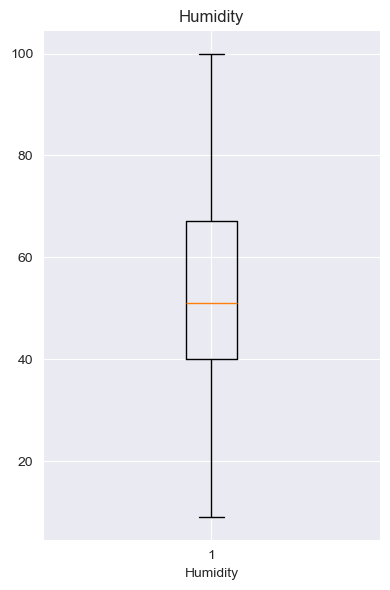

In [13]:
plot_boxplot(weather_df, 'humidity')

- Values range from 9% to 97%.
- Most values lie between 40% and 70%.
- No anomalies or unrealistic entries.

## EDA pressure Plots

In [14]:
weather_df['pressure_hpa'].describe()

count    4392.000000
mean     1015.676908
std         7.885847
min       989.841797
25%      1010.160137
50%      1015.917000
75%      1020.657946
max      1036.912618
Name: pressure_hpa, dtype: float64

In [15]:
weather_df['pressure_hpa'].isna().sum()

0

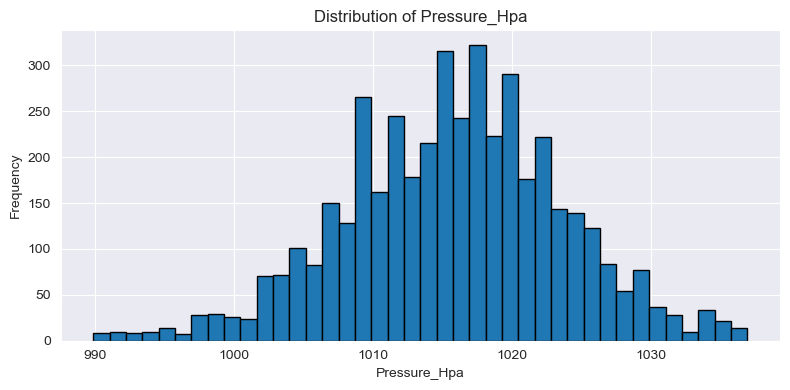

In [16]:
plot_hist(weather_df, 'pressure_hpa')

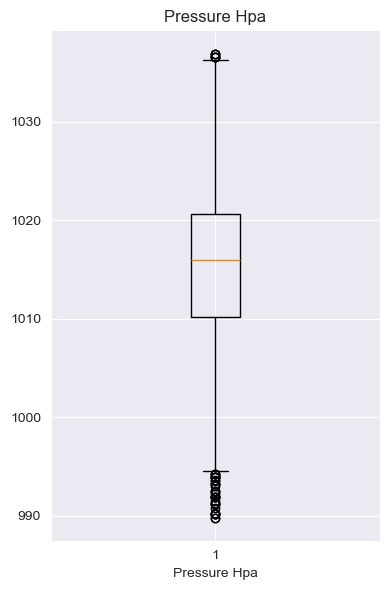

In [17]:
plot_boxplot(weather_df, 'pressure_hpa')

## EDA daily rain

In [18]:
weather_df['daily_precip_mm'].value_counts()

daily_precip_mm
0.000     2554
0.254      622
1.270       96
1.016       96
2.286       94
0.508       72
4.064       72
6.096       48
11.430      48
1.524       48
58.674      24
3.048       24
5.588       24
23.114      24
10.160      24
41.910      24
4.572       24
13.716      24
15.494      24
5.080       24
21.082      24
9.652       24
13.462      24
18.542      24
1.778       24
7.366       24
2.794       24
3.556       24
45.720      24
30.988      24
7.620       24
0.762       24
25.654      24
11.176      24
12.700      23
3.810       21
11.938      21
6.350        1
Name: count, dtype: int64

In [19]:
weather_df['daily_precip_mm'].isna().sum()

0

In [20]:
weather_df['daily_precip_mm'].describe()

count    4392.000000
mean        2.646007
std         7.690361
min         0.000000
25%         0.000000
50%         0.000000
75%         1.016000
max        58.674000
Name: daily_precip_mm, dtype: float64

## EDA dailysnow

In [21]:
weather_df['daily_snow_mm'].value_counts()

daily_snow_mm
0.00      3917
2.54       307
10.16       48
5.08        24
600.00      24
63.50       24
35.56       24
12.70       24
Name: count, dtype: int64

In [22]:
weather_df['daily_snow_mm'].describe()

count    4392.000000
mean        4.205742
std        44.514285
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       600.000000
Name: daily_snow_mm, dtype: float64

In [23]:
weather_df['daily_snow_mm'].isna().sum()

0

EDA fog, rain, snow

In [24]:
weather_df['fog'].value_counts()

fog
0    4361
1      31
Name: count, dtype: int64

In [25]:
weather_df['fog'].isna().sum()

0

In [26]:
weather_df['rain'].value_counts()

rain
0    4169
1     223
Name: count, dtype: int64

In [27]:
weather_df['rain'].isna().sum()

0

In [28]:
weather_df['snow'].value_counts()

snow
0    4313
1      79
Name: count, dtype: int64

In [29]:
weather_df['snow'].isna().sum()

0

## EDA Conditions

In [30]:
weather_df['conditions'].value_counts()

conditions
Clear                  2235
Overcast                971
Mostly Cloudy           307
Partly Cloudy           240
Light Rain              177
Scattered Clouds        116
Unknown                  94
Haze                     91
Light Snow               52
Cloudy                   39
Rain                     18
Snow                     16
Heavy Rain               12
Heavy Snow                6
Clear                     6
Partly Cloudy             3
Mostly Cloudy             2
Fair                      2
Partly Cloud              1
Light Freezing Fog        1
Light Freezing Rain       1
Cloudy                    1
Cloud                     1
Name: count, dtype: int64

In [31]:
weather_df['conditions'].isna().sum()

0

- Most common condition is Clear (2215 times), followed by Overcast (1000).
- Some conditions occur only a few times, e.g., Heavy Snow, Light Freezing Fog.
- Unknown appears 83 times and may indicate missing or invalid sensor data.